##Scrapping Google Apps Review - eg Mobile JKN
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

In [1]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.4 MB/s eta 0:00:00


In [2]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [3]:
#Android App OKEJEK  from Google Play at
#https://play.google.com/store/apps/details?id=id.okejack.okejackapp&hl=id
#The apps ID found in the link after id=app.bpjs.mobile&hl=id
#The apps name on Google Play titled: MobileJKN dari Pemerintah Indonesia (Kemenkes)
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

jkn_reviews = reviews_all(
    'id.okejack.okejackapp',
    sleep_milliseconds=0, # defaults to 0
    lang='id', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [4]:
#Save Mobile JKN reviews into dataframe
df_okejek = pd.DataFrame(np.array(jkn_reviews),columns=['content'])
df_okejek = df_okejek.join(pd.DataFrame(df_okejek.pop('content').tolist()))
df_okejek.to_csv(r'df_okejek', index=False)

## Homework TUGAS 1A

NLP Pipeline:
RAW data (save to csv) lakukan:

* Tokenization
* Lowering
* Stopword Removal
* Lemmatization
* Stemming
* Punctuations Removal
* Expand Contractions
* Spelling Correction
* Rare Words Removal
* Common Words Removal

(save as cleandata.csv)
* Frequent words (n=50,100,1000)
* Frequent Words found (new), contoh: yg, bs, tyt
* ditambahkan di stopwords removal
* Stopwords removal (NLTK, misal case study review hanya dalam Indonesia n=758)


In [5]:
df_okejek

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,f5062dfb-1407-449a-8527-d7017c8eff8f,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"aplikasi blm stabil, layanan mobil sering tida...",5,0,6.6.32,2025-09-03 03:19:25,None,NaT,6.6.32
1,6074ac89-5ee1-429d-b274-7aa6105a8116,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,gak akan pernah pake ini lagi. saya sewa 1 mob...,1,0,6.6.30,2025-09-01 18:06:47,None,NaT,6.6.30
2,35ff2aad-e7c2-463e-8642-8657ce6b2519,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"pelayanan Drivernya gak ramah, Saya order mala...",1,0,None,2025-08-10 11:53:19,None,NaT,None
3,b2422d26-87d5-4aa1-8ecc-61a87b080d3b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,untuk food nya mohon dibanyakin lagi untuk dae...,5,0,6.6.21,2025-08-09 08:51:05,None,NaT,6.6.21
4,a32127d3-63cd-48ac-9ce2-a63c492bf03e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sukses trus OKEJEK aplikasi nya bagus sekali,5,1,6.6.1,2025-07-27 05:12:36,None,NaT,6.6.1
...,...,...,...,...,...,...,...,...,...,...,...
4537,0a498df8-94a5-4778-8917-276f3f93e1c0,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ongkir memang mahal yaa.....,2,3,1.0.1,2016-06-22 06:09:19,Hi ira...lebih murah dari gojek kok...,2016-06-22 08:28:41,1.0.1
4538,86e3813b-f5b4-4c32-8149-4266732faa22,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Mantaf,5,3,None,2016-06-14 12:55:00,Hi mas black...terima kasih sudah dukung karya...,2016-06-22 02:29:53,None
4539,3507b3be-0959-41a8-9dac-269a7d52b8e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,3 bintang dulu kalau bagus saya kasih 5 bintan...,3,1,1.0.0-beta5,2016-06-11 03:50:09,None,NaT,1.0.0-beta5
4540,f0d2243b-3471-4d62-97d5-5c79734ce3ee,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Ini untuk daerah malang,5,4,1.0.0-beta5,2016-06-08 18:50:48,"Halo septi, utk sementara hanya di malang..",2016-06-10 00:46:08,1.0.0-beta5


In [6]:
df_okejek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4542 entries, 0 to 4541
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              4542 non-null   object        
 1   userName              4542 non-null   object        
 2   userImage             4542 non-null   object        
 3   content               4541 non-null   object        
 4   score                 4542 non-null   int64         
 5   thumbsUpCount         4542 non-null   int64         
 6   reviewCreatedVersion  3211 non-null   object        
 7   at                    4542 non-null   datetime64[ns]
 8   replyContent          338 non-null    object        
 9   repliedAt             338 non-null    datetime64[ns]
 10  appVersion            3211 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 390.5+ KB


In [7]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_okejek.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,"aplikasi blm stabil, layanan mobil sering tida...",5,0,6.6.32,2025-09-03 03:19:25,None,NaT
1,gak akan pernah pake ini lagi. saya sewa 1 mob...,1,0,6.6.30,2025-09-01 18:06:47,None,NaT
2,"pelayanan Drivernya gak ramah, Saya order mala...",1,0,None,2025-08-10 11:53:19,None,NaT
3,untuk food nya mohon dibanyakin lagi untuk dae...,5,0,6.6.21,2025-08-09 08:51:05,None,NaT
4,sukses trus OKEJEK aplikasi nya bagus sekali,5,1,6.6.1,2025-07-27 05:12:36,None,NaT
...,...,...,...,...,...,...,...
4537,Ongkir memang mahal yaa.....,2,3,1.0.1,2016-06-22 06:09:19,Hi ira...lebih murah dari gojek kok...,2016-06-22 08:28:41
4538,Mantaf,5,3,None,2016-06-14 12:55:00,Hi mas black...terima kasih sudah dukung karya...,2016-06-22 02:29:53
4539,3 bintang dulu kalau bagus saya kasih 5 bintan...,3,1,1.0.0-beta5,2016-06-11 03:50:09,None,NaT
4540,Ini untuk daerah malang,5,4,1.0.0-beta5,2016-06-08 18:50:48,"Halo septi, utk sementara hanya di malang..",2016-06-10 00:46:08


In [8]:
#Check number of reviews scores
df_okejek['score'].value_counts()

,count
score,
5,2627
1,920
3,373
4,348
2,274


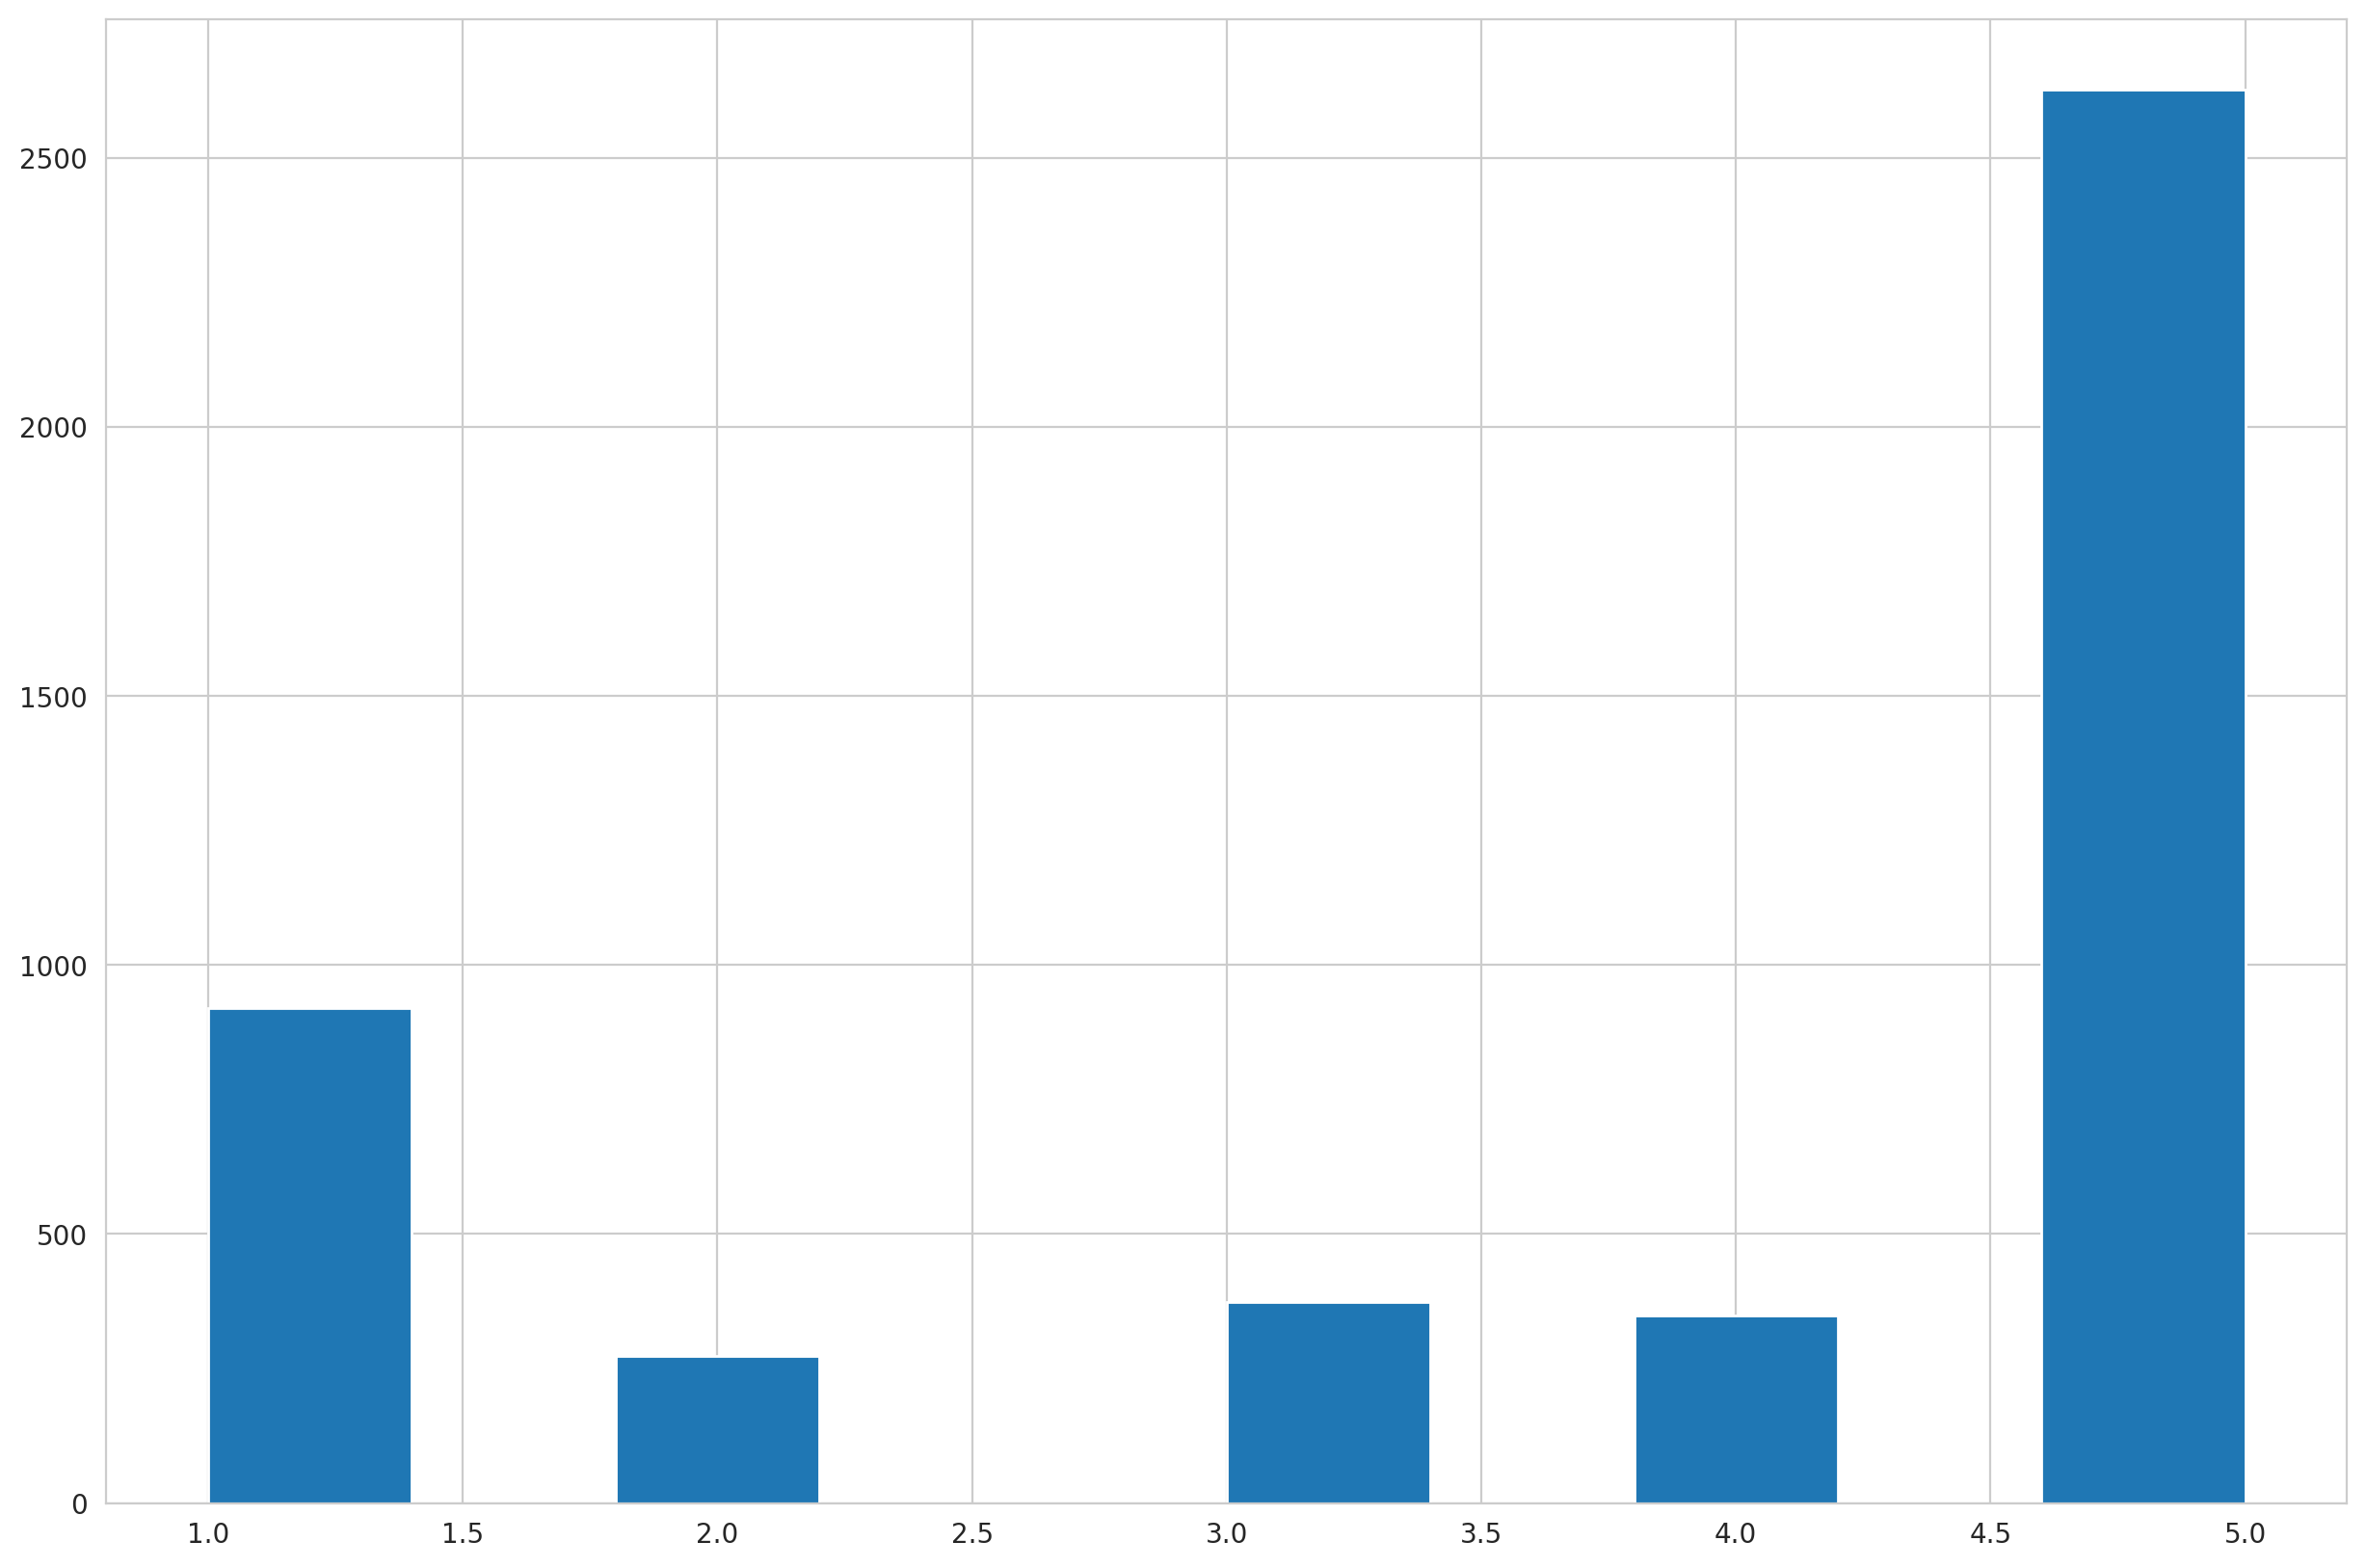

In [9]:
plt.hist(df_okejek['score'])
plt.show()

In [10]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 14.8 MB/s eta 0:00:00


In [11]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_okejek['sentiment_polarity'] = df_okejek['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_okejek['sentiment_subjective'] = df_okejek['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [12]:
df_okejek.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,"aplikasi blm stabil, layanan mobil sering tidak muncul",5,0.000000,0.000000
1,"gak akan pernah pake ini lagi. saya sewa 1 mobil utk ke Bandung. di tengah jalan, sopir nya tiba2 berbelok k rest area dan katanya mau istirahat.. ini berlangsung cukup lama.. kalau seandainya tdk...",1,0.325521,0.333333
2,"pelayanan Drivernya gak ramah, Saya order malah di batalin,, adeeeh",1,0.000000,0.000000
3,"untuk food nya mohon dibanyakin lagi untuk daerah depok,seperti KFC,pizza hut, domino pizza, dll belum ada di depok Jawa Barat trimakasih",5,0.000000,0.000000
4,sukses trus OKEJEK aplikasi nya bagus sekali,5,0.000000,0.000000
...,...,...,...,...
4537,Ongkir memang mahal yaa.....,2,0.000000,0.000000
4538,Mantaf,5,0.000000,0.000000
4539,3 bintang dulu kalau bagus saya kasih 5 bintang semoga kedepan lebih baik,3,0.000000,0.000000
4540,Ini untuk daerah malang,5,0.000000,0.000000


## Lowercasing

In [13]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_okejek['content'] = df_okejek['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_okejek['content'][188])
print(df_okejek['content'][1])
print(df_okejek['content'][2100])

Driver nya gada etika, maki maki customer ! BURUK !
gak akan pernah pake ini lagi. saya sewa 1 mobil utk ke Bandung. di tengah jalan, sopir nya tiba2 berbelok k rest area dan katanya mau istirahat.. ini berlangsung cukup lama.. kalau seandainya tdk sanggup, jangan d ambil order nya. saya butuh cepat, makanya ambil 1 mobil langsung.. mana sopirnya main HP mulu saat nyetir.. bahaya.. gak akan lagi deh pake Okejek...!!!
Bagus


In [14]:
#Lowercase all reviews to see the difference
df_okejek['content']= df_okejek['content'].apply(lambda x: x.lower())
print(df_okejek['content'][188])
print(df_okejek['content'][1])
print(df_okejek['content'][2100])

driver nya gada etika, maki maki customer ! buruk !
gak akan pernah pake ini lagi. saya sewa 1 mobil utk ke bandung. di tengah jalan, sopir nya tiba2 berbelok k rest area dan katanya mau istirahat.. ini berlangsung cukup lama.. kalau seandainya tdk sanggup, jangan d ambil order nya. saya butuh cepat, makanya ambil 1 mobil langsung.. mana sopirnya main hp mulu saat nyetir.. bahaya.. gak akan lagi deh pake okejek...!!!
bagus


##Stopwords Removal
Indonesian Stopwords

In [15]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_okejek['wordCount'] = [len(review.split()) for review in df_okejek['content']]
df_okejek['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_okejek['content']]
df_okejek['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_okejek['content']]

In [17]:
df_okejek.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,"aplikasi blm stabil, layanan mobil sering tidak muncul",5,0.000000,0.000000,8,0,1
1,"gak akan pernah pake ini lagi. saya sewa 1 mobil utk ke bandung. di tengah jalan, sopir nya tiba2 berbelok k rest area dan katanya mau istirahat.. ini berlangsung cukup lama.. kalau seandainya tdk...",1,0.325521,0.333333,62,0,22
2,"pelayanan drivernya gak ramah, saya order malah di batalin,, adeeeh",1,0.000000,0.000000,10,0,3
3,"untuk food nya mohon dibanyakin lagi untuk daerah depok,seperti kfc,pizza hut, domino pizza, dll belum ada di depok jawa barat trimakasih",5,0.000000,0.000000,21,0,4
4,sukses trus okejek aplikasi nya bagus sekali,5,0.000000,0.000000,7,0,0
...,...,...,...,...,...,...,...
4537,ongkir memang mahal yaa.....,2,0.000000,0.000000,4,0,5
4538,mantaf,5,0.000000,0.000000,1,0,0
4539,3 bintang dulu kalau bagus saya kasih 5 bintang semoga kedepan lebih baik,3,0.000000,0.000000,13,0,0
4540,ini untuk daerah malang,5,0.000000,0.000000,4,0,0


In [18]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_okejek['sentiment_rating'] = df_okejek['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [19]:
df_okejek.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,"aplikasi blm stabil, layanan mobil sering tidak muncul",5,0.000000,0.000000,Positive
1,"gak akan pernah pake ini lagi. saya sewa 1 mobil utk ke bandung. di tengah jalan, sopir nya tiba2 berbelok k rest area dan katanya mau istirahat.. ini berlangsung cukup lama.. kalau seandainya tdk...",1,0.325521,0.333333,Negative
2,"pelayanan drivernya gak ramah, saya order malah di batalin,, adeeeh",1,0.000000,0.000000,Negative
3,"untuk food nya mohon dibanyakin lagi untuk daerah depok,seperti kfc,pizza hut, domino pizza, dll belum ada di depok jawa barat trimakasih",5,0.000000,0.000000,Positive
4,sukses trus okejek aplikasi nya bagus sekali,5,0.000000,0.000000,Positive
...,...,...,...,...,...
4537,ongkir memang mahal yaa.....,2,0.000000,0.000000,Negative
4538,mantaf,5,0.000000,0.000000,Positive
4539,3 bintang dulu kalau bagus saya kasih 5 bintang semoga kedepan lebih baik,3,0.000000,0.000000,Neutral
4540,ini untuk daerah malang,5,0.000000,0.000000,Positive


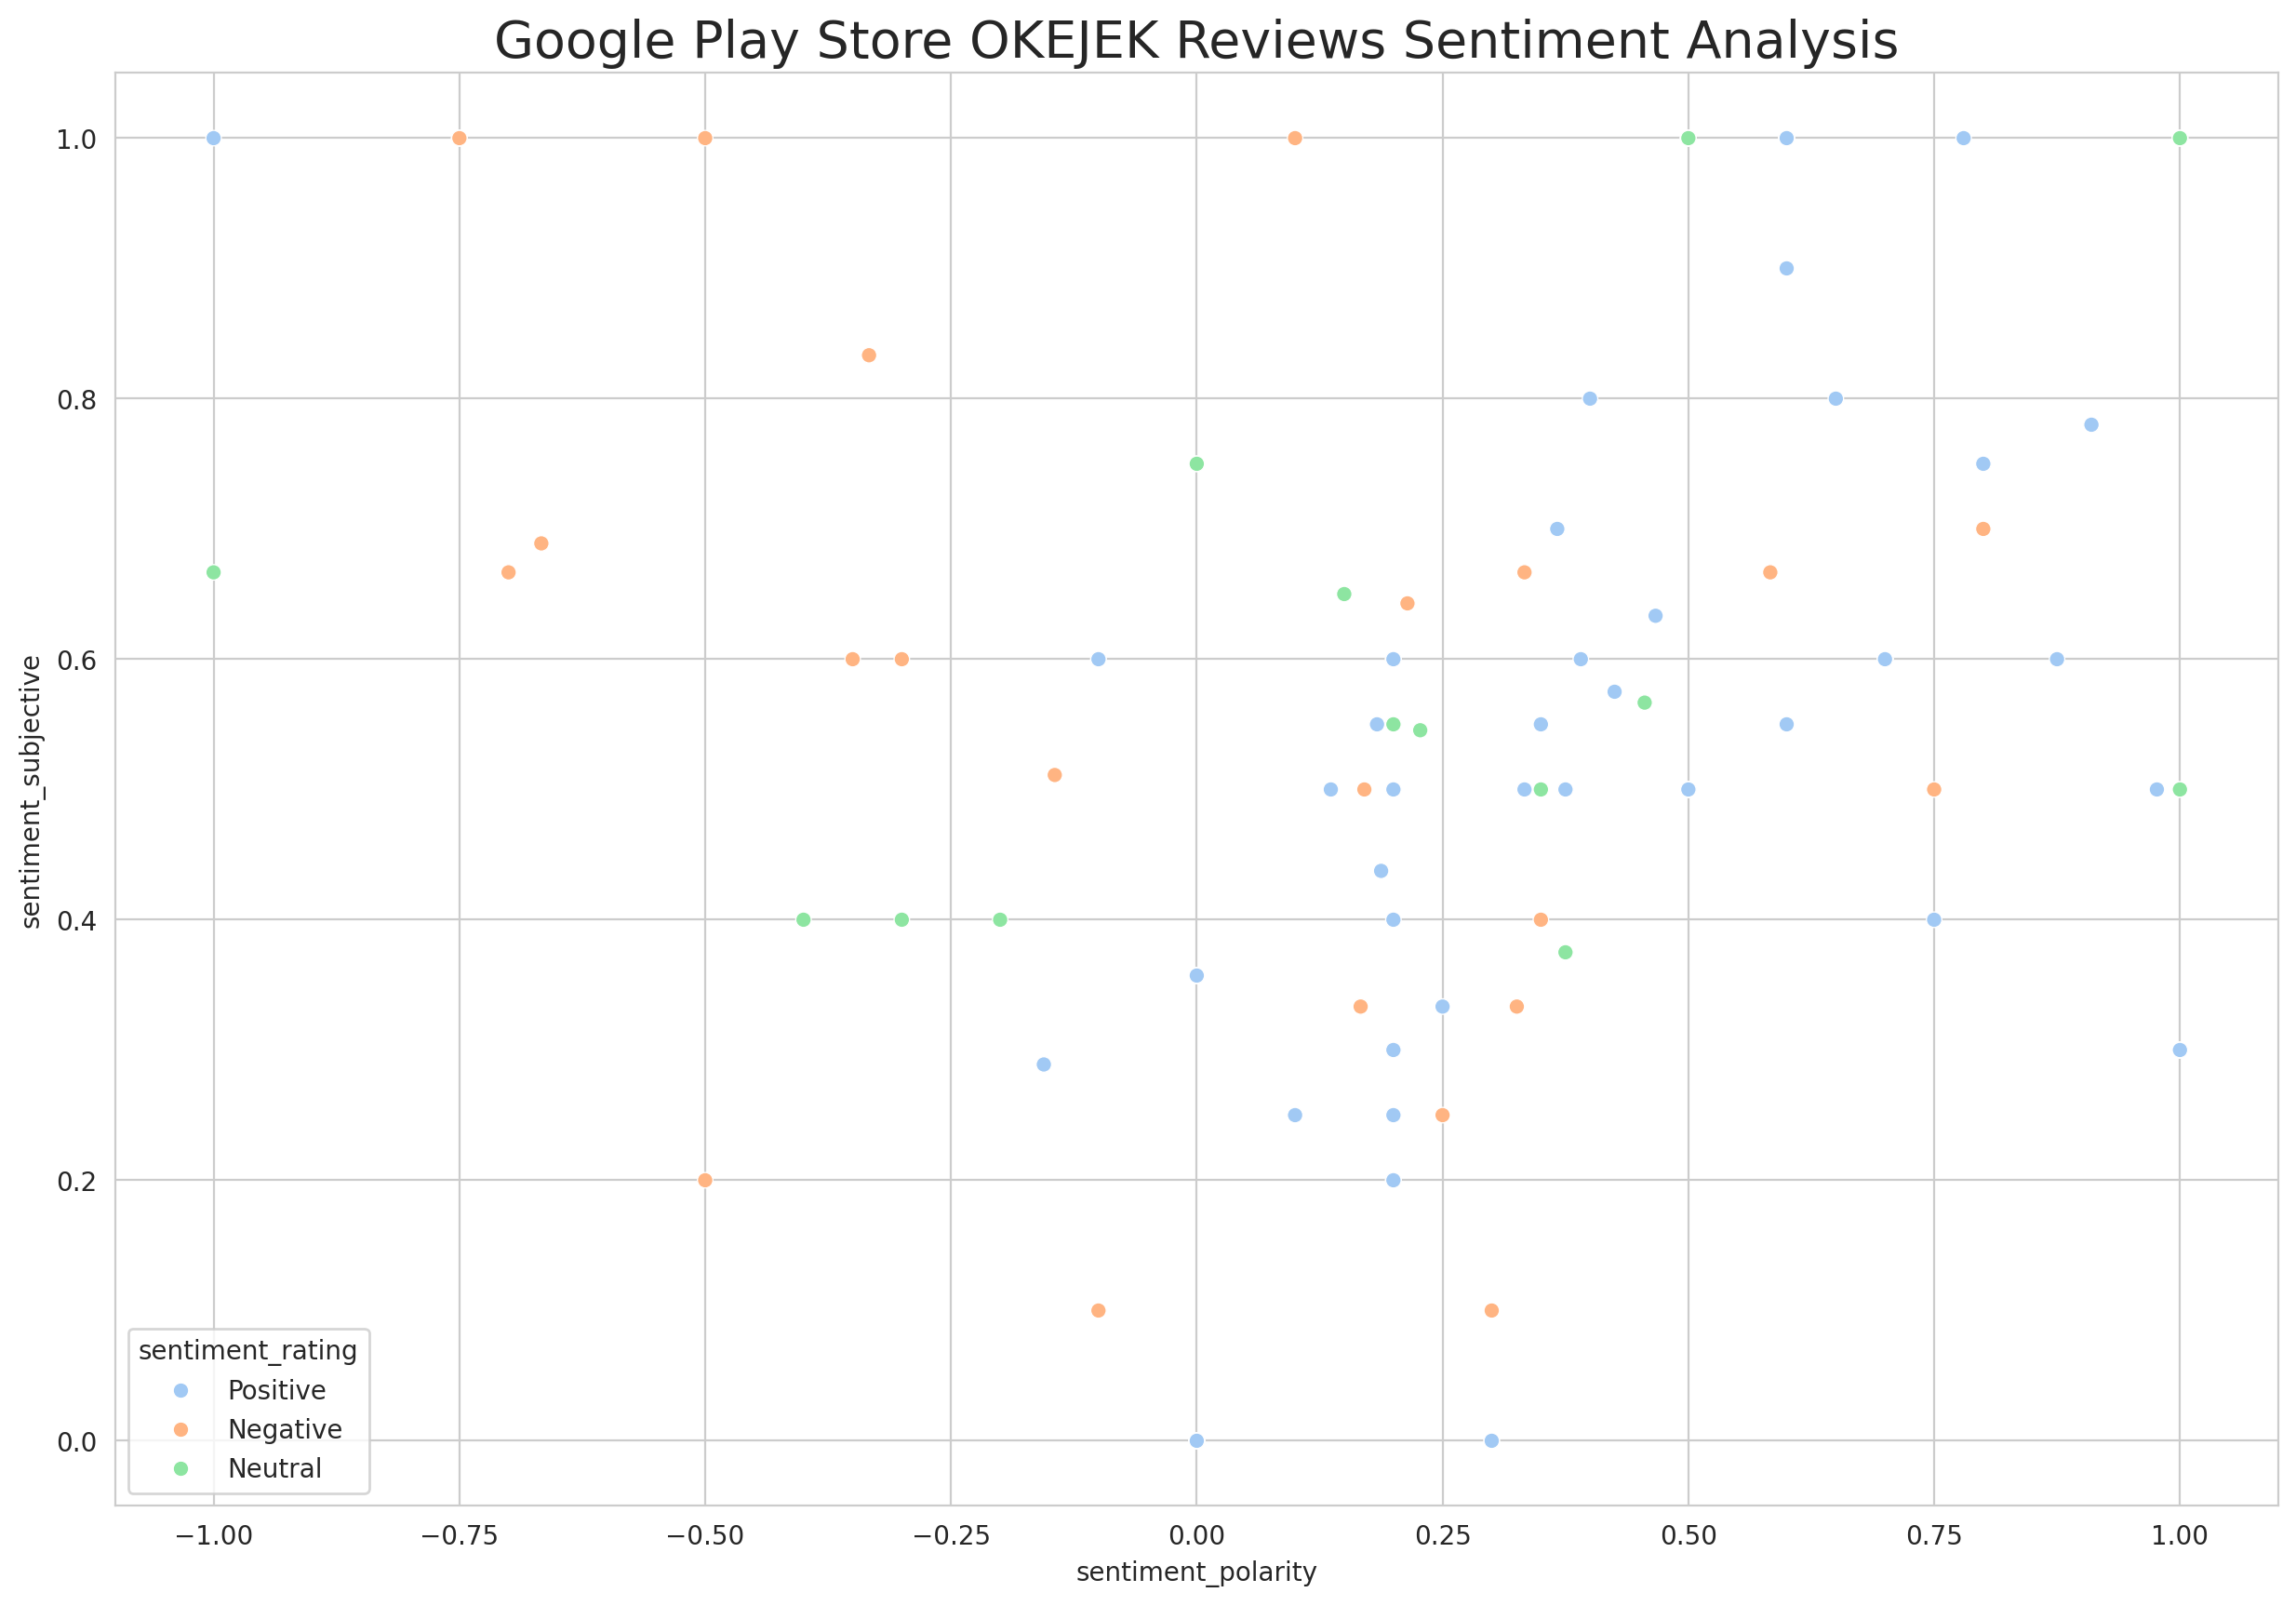

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_okejek['sentiment_polarity'], y=df_okejek['sentiment_subjective'],
                hue=df_okejek['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store OKEJEK Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [21]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


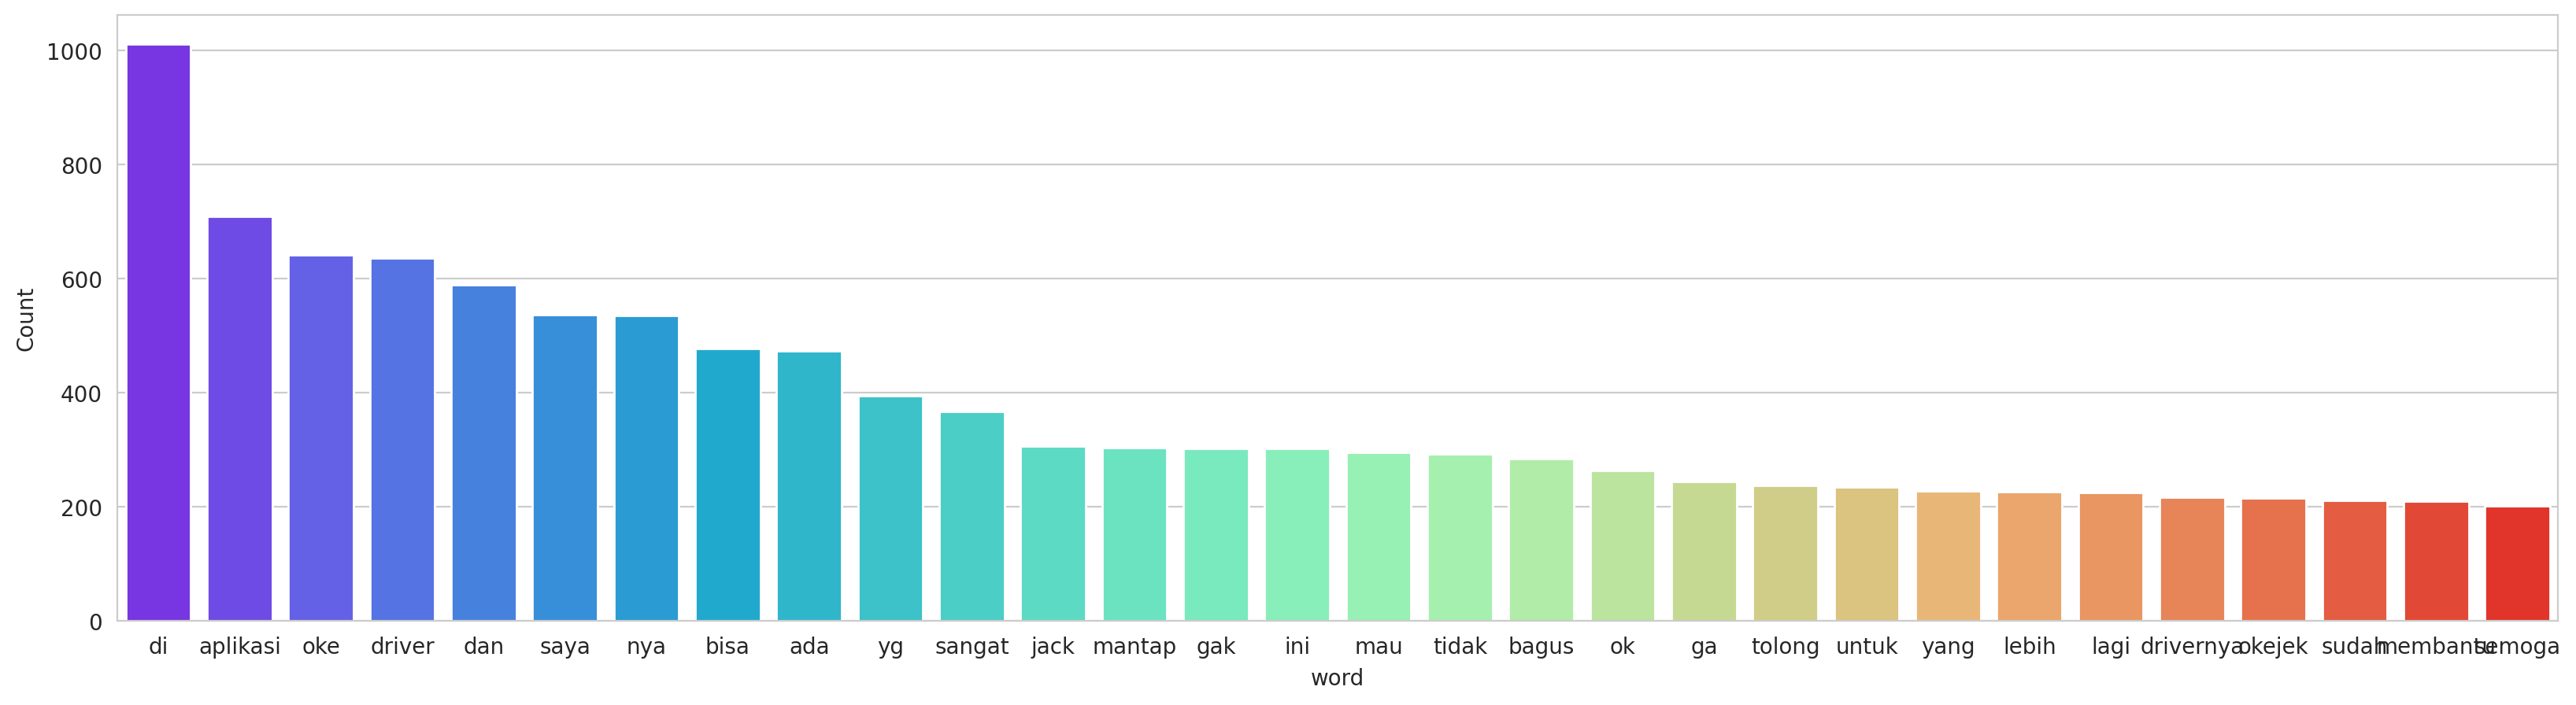

In [22]:
freq_words(df_okejek['content'])

In [23]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_okejek['content'] = df_okejek['content'].apply(lambda x: stopword_remover.remove(x))


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 11.5 MB/s eta 0:00:00


In [24]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_okejek is your DataFrame and 'content' is the column
df_okejek['content'] = df_okejek['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
# english_stopwords(len)

In [26]:
df_okejek.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,"aplikasi blm stabil, layanan mobil sering muncul",5,0.000000,0.000000,Positive
1,"gak pernah pake lagi. sewa 1 mobil utk bandung. tengah jalan, sopir nya tiba2 berbelok k rest area katanya mau istirahat.. berlangsung cukup lama.. kalau seandainya tdk sanggup, jangan ambil order...",1,0.325521,0.333333,Negative
2,"pelayanan drivernya gak ramah, order malah batalin,, adeeeh",1,0.000000,0.000000,Negative
3,"food nya mohon dibanyakin untuk daerah depok,seperti kfc,pizza hut, domino pizza, belum di depok jawa barat trimakasih",5,0.000000,0.000000,Positive
4,sukses trus okejek aplikasi nya bagus sekali,5,0.000000,0.000000,Positive
...,...,...,...,...,...
4537,ongkir memang mahal yaa.....,2,0.000000,0.000000,Negative
4538,mantaf,5,0.000000,0.000000,Positive
4539,3 bintang dulu kalau bagus kasih 5 bintang semoga kedepan lebih baik,3,0.000000,0.000000,Neutral
4540,untuk daerah malang,5,0.000000,0.000000,Positive


In [27]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


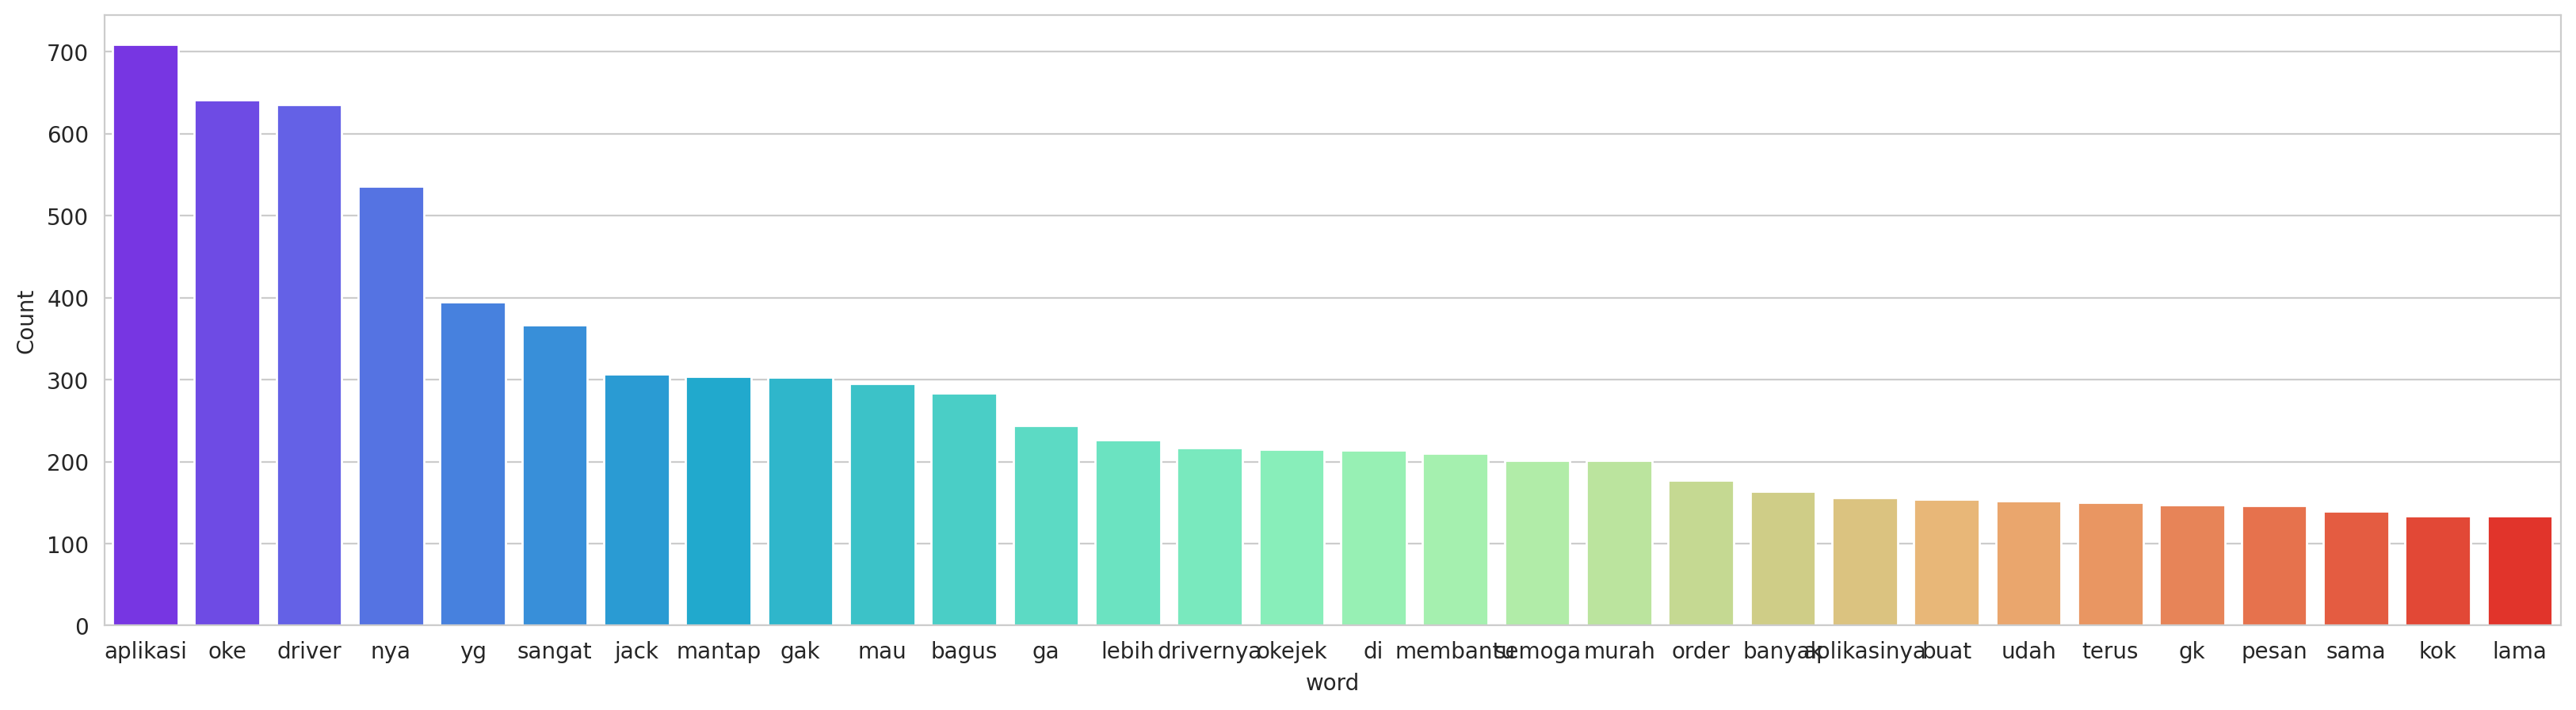

In [28]:
freq_words(df_okejek['content'])

In [31]:
df_okejek.to_csv("okejek_comments.csv", index=False)

In [30]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_jknrev_stopwords['wordCount'] = [len(review.split()) for review in df_jknrev_stopwords['content']]
df_jknrev_stopwords['wordCount_after_stopwords'] = [len(review.split()) for review in df_jknrev_stopwords['review_after_stopwords']]


NameError: name 'df_okejek_stopwords' is not defined